<a href="https://colab.research.google.com/github/movie112/INU-DILAB/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1강: 딥러닝 기초1
## contents
- 지난 시간 리뷰
- Audio task
- 딥러닝 기초 리뷰
  - FC layer, CNN, RNN, LSTM, Attention
- 오디오 다루는 방법, 실험하기 좋은 환경을 만들기 위해 어떻게 딥러닝 아키텍쳐에 맞게 설계하고 어떻게 데이터 파이프라인을 짜야 하는가
---

## 지난 시간 리뷰
- 소리: 진동으로 인한 __공기의 압축__   
- 파동(wave)   
  - 압축이 얼마나 되었는지 표현   
  - 진동하며 공간/매질을 전파해나가는 현상   
  - 질량의 이동은 없으나 에너지/운동량의 운반 존재

#### - 소리에서 얻는 물리량
> - 진폭: Amplitude(Intensity)
> - 주파수: Frequency
> - 위상: Phase(Degrees of displacement)
> ##### 1.  물리 음향: DSP 영역
> - 소리 진폭의 세기: intendity
> - 소리 떨림의 빠르기: Frequency
> - 소리 파동의 모양: Tone-Color
> ##### 2.  심리 음향: 사람 귀
> - 소리 크기: Loudness
> - 음정, 소리의 높낮이: Pitch
> - 음색, 소리 감각: Timbre

- 주파수(Frequency): 단위: Hertz
  - 소리가 얼마나 압축되었는지
  - 1초 동안 진동 횟수
  - 소리의 높낮이 결정
    - low F: 낮은 소리
    - high F: 높은 소리 
- 주기(Period): 파동이 한 번 진동하는데 걸리는 시간, 길이
- 복합파(Complex Wave): 복수의 서로 다른 정현파들의 합
- 푸리에 변환(Fourier transform)
  - 입력 신호를 다양한 주파수를 갖는 주기함수(복수 지수함수)들의 합으로 분해하여 표현
  - 입력 신호를 주파수 영역으로 
  - 결과: 주파수의 강도, 위상 
- 일반적으로 input audio를 frame 단위로 나누고 STFT 하고 나온 time by frequency 영역의 matrix를 band
---

## audio task
audio를 deep learning에 넣어보자     
##### 1. sound 영역
  - speech classification & auto-tagging
    - 칼이 부딪히는 소리 tagging -> input이 없어도 user가 어떤 환경인지 인식(요리 중)
    - activation: input 놓었을 때 (헤이 카카오)

##### 2. speech 영역
  - 음성인식: speech recognition (STT)
    - 특정인이 말한 내용을 텍스트로 이해
  - 음성합성: speech synthesis (TTS)
    - 텍스트를 음성으로 변환함
  - 음성변환: speech style transfer (STS)
    - 음성 to 음성

<img src="http://t1.kakaocdn.net/braincloud/homepage/article_image/201804021504276325523.png" width="500px" height="300px"></img>
---

## 딥러닝 기초 리뷰
- input and output
- architectures
- losses

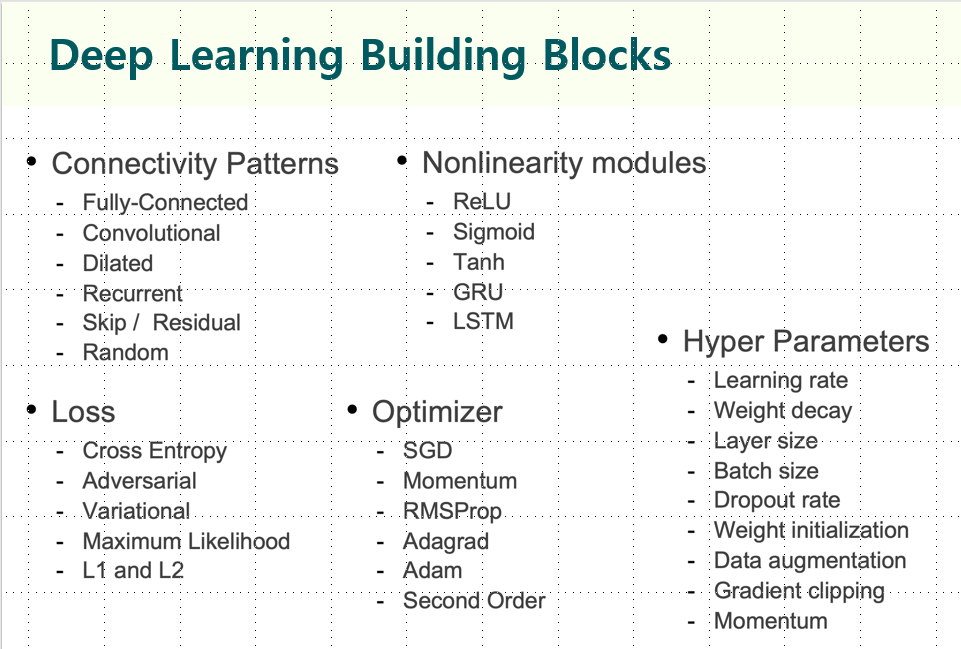

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/210722_210727/20210725.PNG')


---

#### - multi layer perceptron (MLP)
<img src="https://miro.medium.com/max/432/1*y0pXhfaTGmvfNwaGoHnW5w.jpeg" width="500px" height="250px"></img>
  - 노드 간 선형 결합
  - z1 = W1*x+b1 
  - -> activation function(z1) -> h
  - -> z2 = W2*h+b2

#### - 비선형 함수
  - input unit 간의 상호작용 catch하기 위해 비선형 구간 필요
  - 선형 결합식만으로는 비선형적인 패턴 가진 dataset 분류 불가능

#### - CNN
  - convolution layer: 입력을 필터를 사용하여 convolution 연산을 함
  - filter(feature map)와 input과 곱하고  pooling layer로 넘겨서 다운 샘플링 작업 -> flat하게 만들어 FC layer의 하나의 node처럼 쓸 수 있다.
  - pooling 반복작업: low한 input data에서 feature를 뽑는 과정    

-  CNN in Audio
> - conv: width, height, channel -> audio는 channel 없음
> - 1D
>   - conv filter 크기: frequency 고정, time에 따라 진행
> - 2D
>   - 일반적으로 사용
>   - conv filter 크기: time-frequencye에 따라 진행
> - sample CNN
>   - 장점: "phase-invariant" representation을 반영 -> 보통 input phase영역 날리고 쓰지만 phase에도 많은 정보 존재

#### - RNN
- hidden state를 유지하며 이전 출력을 입력으로 사용할 수 있는 신경망
- 어떠한 input length 커버 가능
- input size에 따라 모델 size 증가X
- historical information 잘 활용
- 시간 축에 따른 weights sharing 진행

#### - LSTM
- 기존 RNN에서 vanashing gradient를 처리, GRU의 일반화된 모델
- gate 추가

#### - attention
- 기존 RNN의 encoding 방식에서 마지막 hidden state까지 학습을 하면서 연산하는 것 해결
- input source와 hidden state의 관계를 학습시키는 추가적인 Network 만듦
- hidden state 2개가 softmax 거쳐서 형성한 alignment에 FC 붙어서 context vector 생성